NAMA : Atmaja JNK
NIM : 20SA1096

#JAMAK


Import Library

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py


import cv2 
import common 
import numpy as np 


%matplotlib inline 
from matplotlib import pyplot as plt 
import pylab 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) 

--2022-12-26 12:33:07--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2022-12-26 12:33:07 (19.0 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2022-12-26 12:33:08--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercont

Menyambungkan dengan Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menambahkan citra yang akan diuji

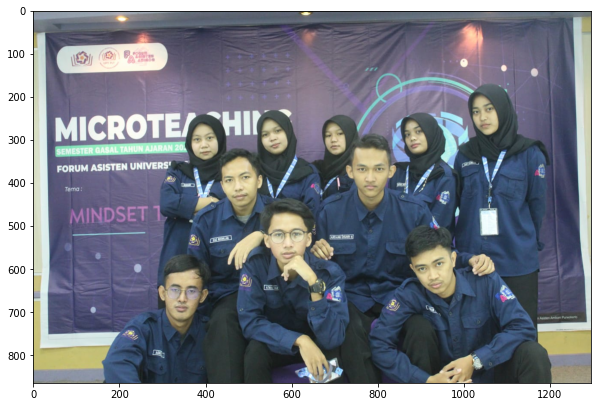

In [ ]:
base_image = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/FA.jpeg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

Face Detection


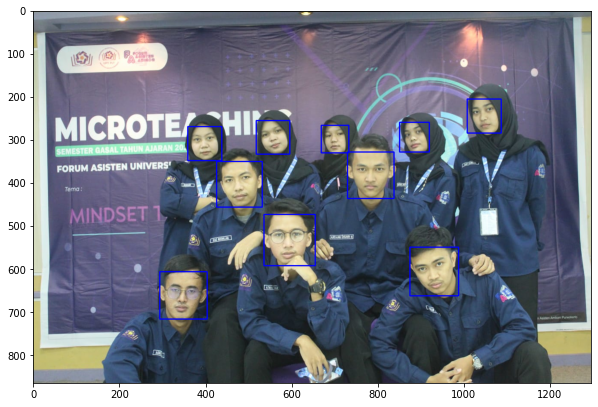

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/FA.jpeg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Smile Detection


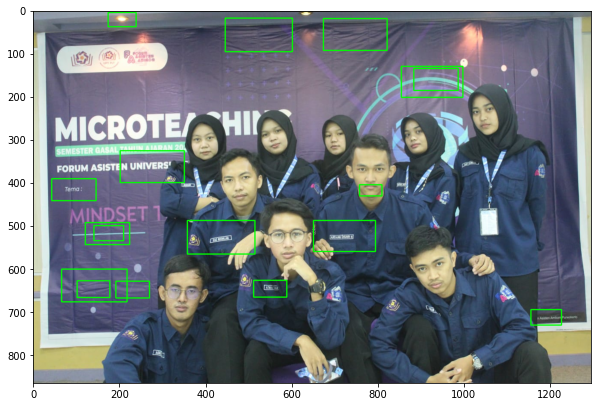

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/FA.jpeg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

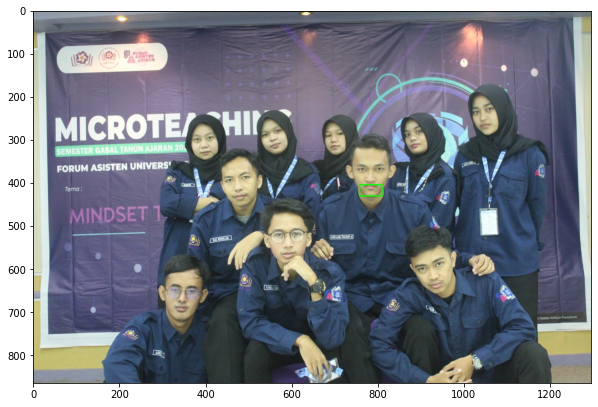

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/FA.jpeg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Eye Detection

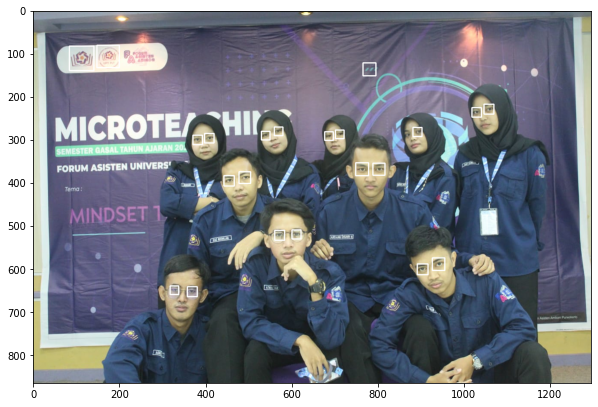

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/FA.jpeg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

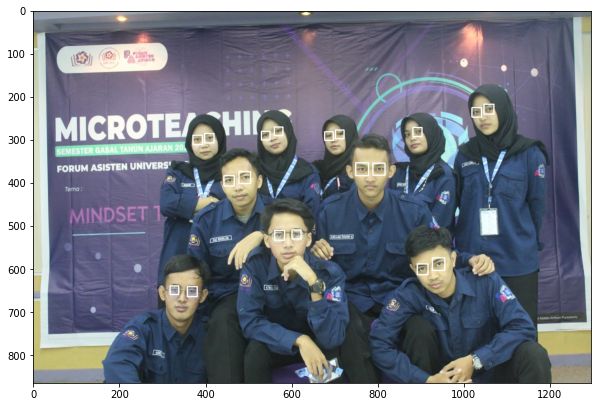

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/FA.jpeg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Putting all together



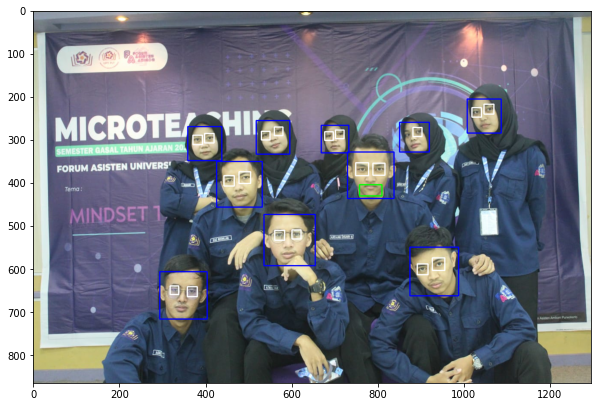

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/FA.jpeg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Modern Object Recognition

#TUNGGAL

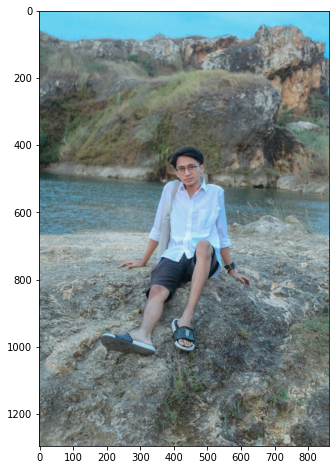

In [ ]:
base_image1 = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/Atmaja.jpeg')
grey = cv2.cvtColor(base_image1, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image1, cv2.COLOR_BGR2RGB))

Face Detection

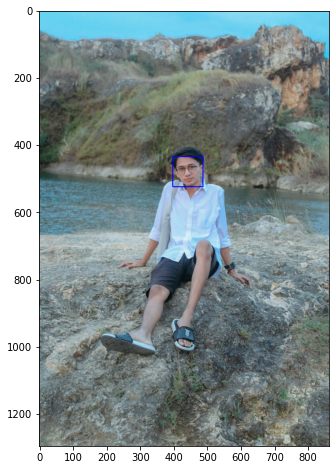

In [ ]:
# this is a pre-trained face cascade
test_image1 = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/Atmaja.jpeg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image1,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB))

Smile Detection

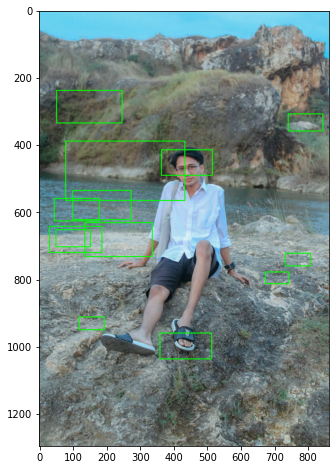

In [ ]:
test_image1 = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/Atmaja.jpeg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image1,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB))

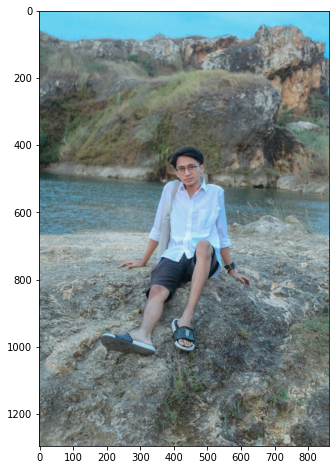

In [ ]:
test_image1 = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/Atmaja.jpeg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image1, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB))

Eye Detection

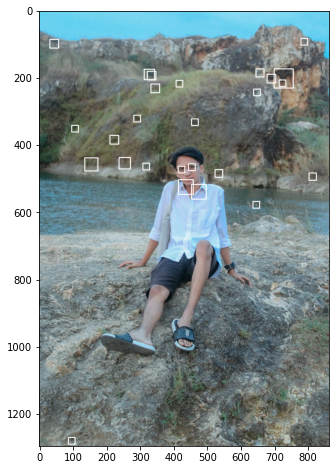

In [ ]:
test_image1 = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/Atmaja.jpeg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image1,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB))

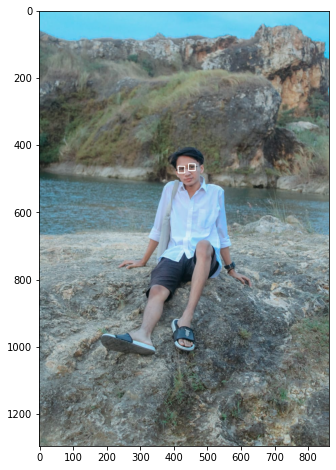

In [ ]:
test_image1 = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/Atmaja.jpeg')
for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image1, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB))

Putting All

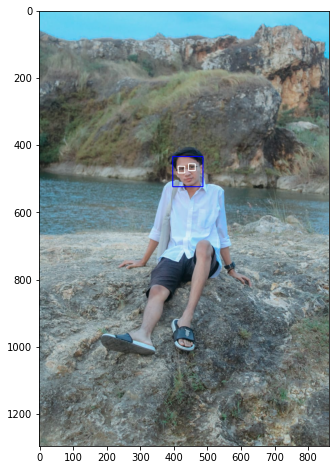

In [ ]:
test_image1 = cv2.imread('/content/drive/MyDrive/Visi Komputer/Praktikum 11/Atmaja.jpeg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image1,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image1, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image1, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB))